# 神经网络

> 从人工特征到自动学习特征

# 多层感知机

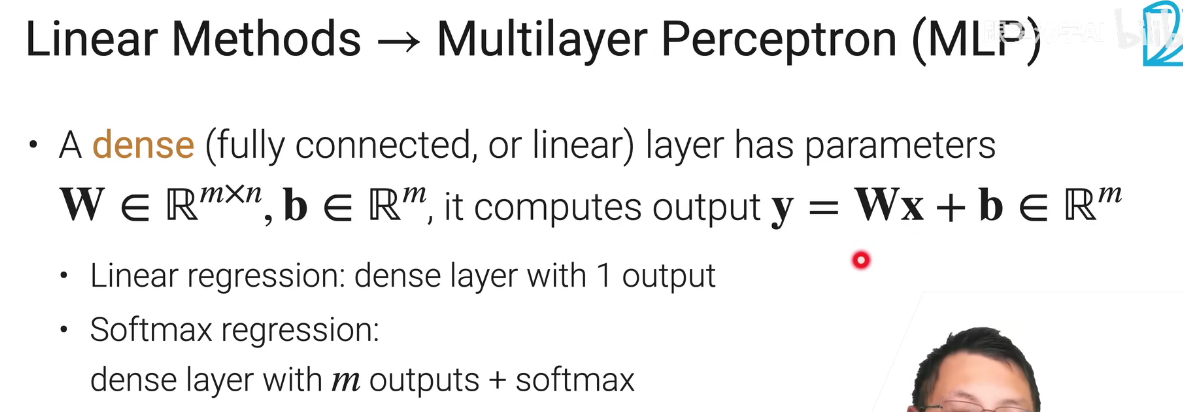

> 线性模型相当于单层感知机

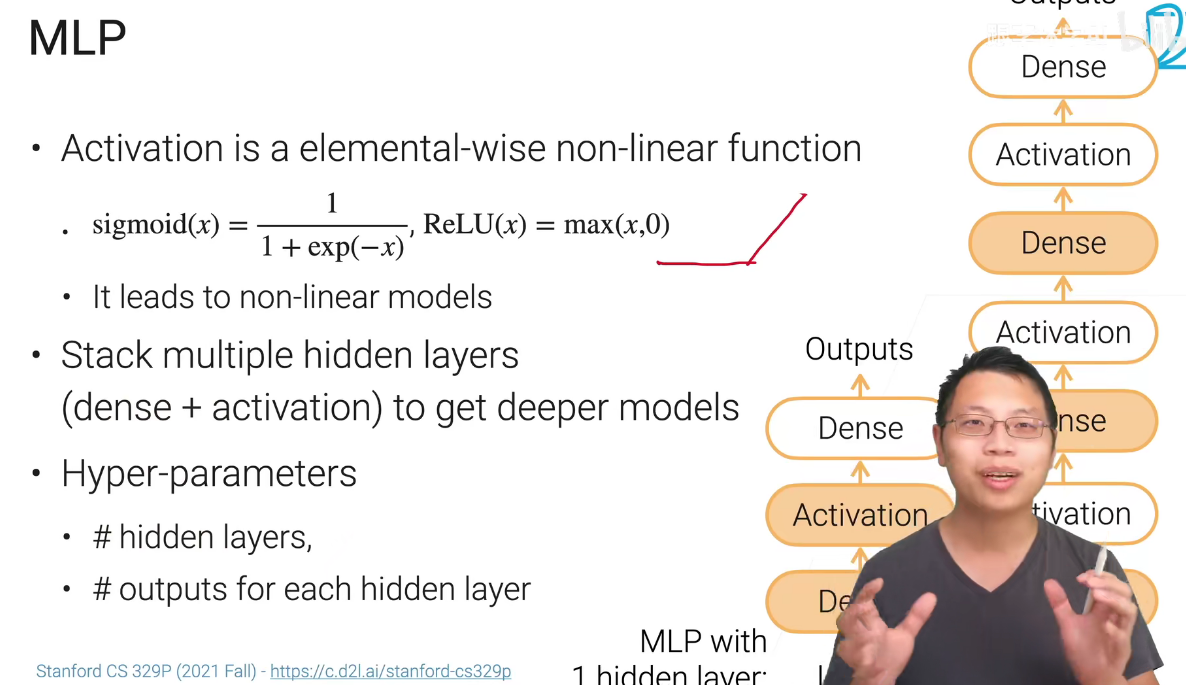

- 超参数
    - 隐藏层数目
    - 隐藏层单元数

## 简单代码实现 

In [ ]:
def relu(x):
    return torch.max(x,0)

# randn：均值为0，方差为1的正态分布
W1 = nn.Parameter(torch.randn(num_inputs,num_hiddens)*0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens))
W2 = nn.Parameter(torch.randn(num_hiddens,num_outputs)*0.01)
b2 = nn.Parameter(torch.zeros(num_outputs))

H = relu(X @ W1 + b1) # 隐藏层
Y = H@W2 + b2 # 输出层

# 卷积神经网络

> 抓取空间信息

用MLP去做图片分类(300x300)分成1000类，如果中间隐藏层取10000，那么参数w达到了9亿。

考虑到两个性质：

- 平移不变性：处于图片不同位置也能识别出来
- 局部关联性

卷积层

- 每个输出只取决于kxk维窗口的输入

## 卷积单通道代码实现 

In [ ]:
# cross-corelation
# 输入X，权重矩阵K
h,w = K.shape
Y = torch.zeros((X.shape[0]-h+1,X.shape[1]-w+1)) # 没有填充的情况下
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        Y[i,j] = (X[i:i+h,j:j+w] * K).sum() # 两个hxw维矩阵点积后求和

## 池化单通道代码实现

In [ ]:
# h,w池化宽和高
Y = torch.zeros((X.shape[0]-h+1,X.shape[1]-w+1))
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
        if mode == 'max':
            Y[i,j] = X[i:i+h,j:j+w].max()
        elif mode == 'avg':
            Y[i,j] = X[i:i+h,j:j+w].mean()

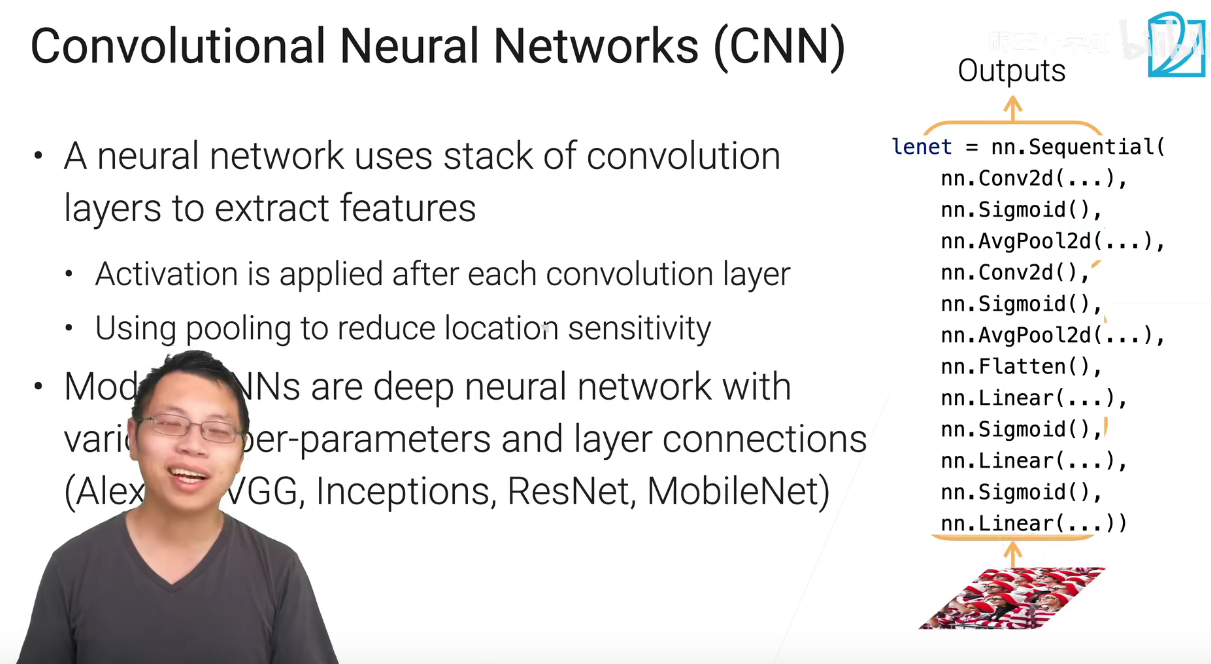

# 循环神经网络

> 抓取时序信息

语言模型：预测下一词

如果用MLP去做预测（相当于做多分类）-》如何保存时序信息，如何把一个变长的序列变成一个固定长度的向量

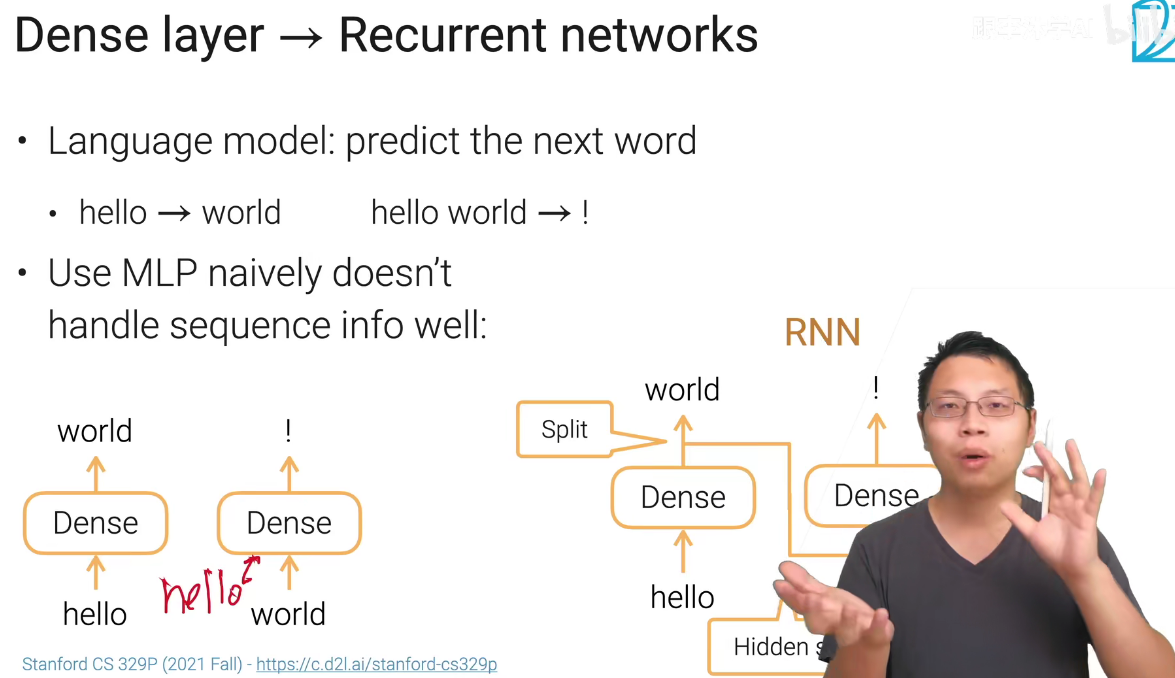

- 双向神经网络
- 多层RNN

## RNN简单代码实现 

In [ ]:
W_xh = nn.Parameter(torch.randn(num_inputs,num_hiddens)*0.01)
W_hh = nn.Parameter(torch.randn(num_hiddens,num_hiddens)*0.01)
b_h = nn.Parameter(torch.zeros(num_hiddens))

H = torch.zeros(num_hiddens)
outputs = []

for X in inputs: # inputs.shape: num_steps,batch_size,num_inputs
    H = torch.tanh(X @ W_xh + H @ W_hh + b_h)
    outputs.append(H)

# transformer

> 既可以抓取空间也可以抓取时间信息